# Transformasi Data Weather Type Classification

Nama : Friza Nur Fatmala

NPM : 23083010051

Analisis Data Eksploratif - A083

Tugas 4 - Transformasi Data

In [1]:
# Mengimpor library yang dibutuhkan 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## A. Memasukkan Data dan Menampilkan Informasi

In [2]:
df = pd.read_csv("C:\\Users\\friza nur fatmala\\OneDrive\\文档\\Sains Data\\SEMESTER 3\\EDA\\TUGAS\\weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Dataset ini terdiri atas 13200 baris dan 11 variabel yang meliputi Temperature, Humidity, Wind Speed, Precipitation (%), Cloud Cover, Atmospheric Pressure, UV Index, Season, Visibility (km), Location, dan Weather Type. Terdapat 7 variabel yang merupakan data numerik dengan 5 variabel bertipe float dan 2 variabel bertipe integer. Sementara itu, 4 varibel sisanya merupakan data kategorik dengan tipe data object.

## B. Missing Value

In [4]:
# Mendeteksi Missing Value
df.isnull()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13195,False,False,False,False,False,False,False,False,False,False,False
13196,False,False,False,False,False,False,False,False,False,False,False
13197,False,False,False,False,False,False,False,False,False,False,False
13198,False,False,False,False,False,False,False,False,False,False,False


Saat dilakukan pemeriksaan missing value, dapat dilihat bahwa seluruh variabel dalam dataset Weather Type Classification secara sekilas menunjukkan hasil false. Artinya, dataset ini tidak memiliki satupun missing value dalam seluruh variabelnya. Namun, untuk memperoleh hasil yang lebih akurat, akan dilakukan perhitungan lebih lanjut pada setiap variabel.

In [5]:
# Menghitung Missing Value
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Hasil ini membuktikan bahwa kesepuluh variabel dalam dataset Weather Type Classification tidak memiliki missing value. Dengan begitu, proses transformasi data akan dilanjutkan pada pembuatan dummy variabel.

## C. Dummy Variabel

Dummy variabel merupakan sebuah variabel yang berfungsi untuk mengubah data kualitatif menjadi data kuantitatif sehingga dapat digunakan dalam model regresi atau analisis statistik lain. Biasanya, setiap data dalam variabel-variabel tersebut akan diwakili oleh angka 0 dan angka 1. Jumlah kolom dummy variabel disesuaikan dengan jumlah kategori pada variabel yang akan diubah dan dikurangkan dengan satu. Artinya, jika terdapat empat kategori dalam sebuah variabel kualitatif, maka jumlah kolom dummy yang terbentuk sebanyak tiga. Hal ini dilakukan untuk mencegah terjadinya multikolinearitas di mana dua atau lebih variabel independen berkorelasi tinggi.

In [6]:
# Membentuk Dummy Variabel untuk Setiap Data Kualitatif
dummies = pd.get_dummies(df, drop_first=True)
dummies

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,14.0,73,9.5,82.0,1010.82,2,3.5,0,0,1,0,0,1,1,0,1,0,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,0,1,1,0,0,1,0,0,0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,0,0,0,1,0,0,0,1,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,0,0,0,1,0,0,0,0,0,0,1
4,27.0,74,17.0,66.0,990.67,1,2.5,0,1,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0,0,1,0,0,1,0,0,1,1,0,0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0,1,0,0,0,0,1,0,0,0,1,0
13197,30.0,77,5.5,28.0,1012.69,3,9.0,0,1,0,0,0,0,0,0,0,0,0
13198,3.0,76,10.0,94.0,984.27,0,2.0,0,1,0,0,0,1,1,0,0,1,0


Dalam dataset ini, seluruh variabel kualitatif termasuk Cloud Cover, Season, Location dan Weather Type akan diubah menjadi variabel dummy. Pada variabel Cloud Cover, kolom Cloud Cover_Clear sengaja dihilangkan untuk mencegah multikolinearitas. Sedangkan pada variabel Season, Location, dan Weather Type, kolom yang dihapus adalah Season_Autumn, Location_coastal, serta Weather type_cloudy. Variabel-variabel tersebut kemudian akan ditandai dengan angka 0 pada semua variabel yang tersisa.

## D. Outlier

Outlier merupakan nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data, entah itu lebih rendah ataupun lebih tinggi. Outlier dapat disebabkan oleh berbagai hal, mulai dari kesalahan penginputan, perubahan metode pengumpulan data, hingga variasi alamiah dari data. Terdapat berbagai cara dalam mendeteksi outlier pada sebuah dataset. Dalam kesempatan ini, saya akan menggunakan box plot dan Zscore untuk menemukan outlier pada setiap variabel dalam dataset ini.

### Mendeteksi Outlier

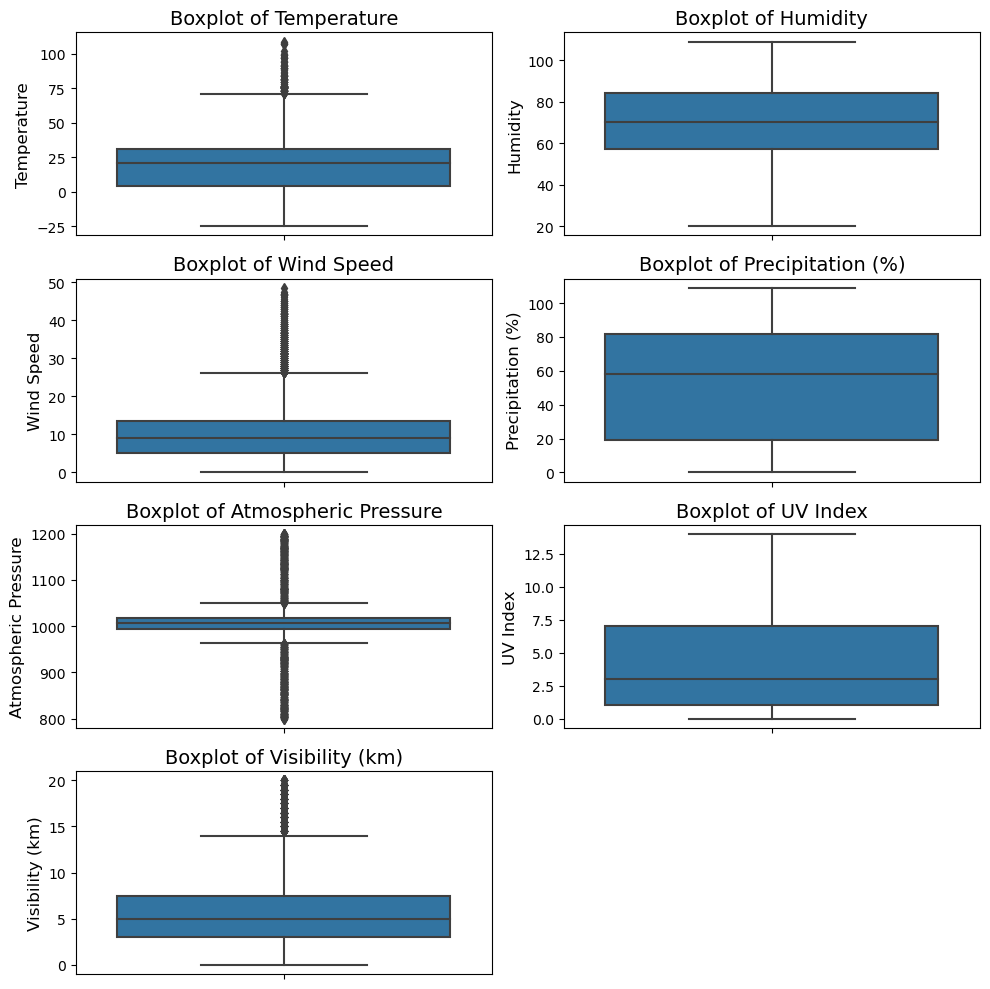

In [7]:
# Melihat Outlier pada Data Melalui Boxplot
def create_boxplot(data, columns):
    plt.figure(figsize=(10, 10)) 
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.boxplot(data=data, y=column)  
        plt.title(f'Boxplot of {column}', fontsize=14)  
        plt.ylabel(column, fontsize=12)  
    plt.tight_layout()  
    plt.show()  
    
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
create_boxplot(df, numerical_columns)

Berdasarkan box plot diatas, diketahui bahwa variabel Temperature, Wind Speed, dan Visibility memiliki outlier pada batas atas sedangkan variabel Atmospheric Pressure memiliki outlier pada kedua batas. Untuk mengetahui jumlah outlier pada keempat variabel tadi, akan dilakukan pengujian menggunakan nilai Zscore. Zscore merupakan ukuran statistik yang menunjukkan seberapa jauh suatu nilai berada dari rata-rata (mean) dalam satuan deviasi standar. Apabila Zscore suatu data menunjukkan angka yang lebih besar dari 3 atau kurang dari -3 maka data tersebut dikategorikan sebagai outlier.

In [8]:
#Menghitung Jumlah Outlier pada Setiap Variabel
def detect_outliers_zscore(data, column):
    z_scores = np.abs(stats.zscore(data[column]))  
    threshold = 3  
    outliers = data[z_scores > threshold]  
    return outliers

outlier_columns = ['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']

for column in outlier_columns:
    outliers = detect_outliers_zscore(df, column)
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")

Outliers in Temperature:
       Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
210           78.0        81         8.0               78.0       overcast   
228           73.0        82        47.0              107.0       overcast   
535           80.0        76         3.0               93.0          clear   
709           74.0       101        18.0               76.0  partly cloudy   
730           76.0        91        13.5               82.0  partly cloudy   
...            ...       ...         ...                ...            ...   
12752         90.0        83        15.0               98.0          clear   
12814         72.0        88        12.0               83.0          clear   
12878         95.0        96         1.0               84.0  partly cloudy   
13065         97.0        95         7.5               79.0          clear   
13108         81.0        81        10.5               96.0          clear   

       Atmospheric Pressure  UV Index 

Berdasarkan hasil tersebut diketahui bahwa variabel Temperature memiliki 92 data outlier, Wind Speed memiliki 236 data outlier, Atmosphecric Pressure memiliki 556 data outlier, dan variabel visibility memiliki 282 data outlier. Data outlier ini dapat memengaruhi hasil analisis maupun visualisasi dari sebuah data. Oleh karena itu, nilai outlier harus bisa diatasi. Terdapat berbagai cara untuk bisa mengatasi nilai outlier. Menurut saya, cara yang paling cocok untuk mengatasi nilai outlier pada dataset ini adalah imputasi. Proses imputasi akan mengganti seluruh data outlier dengan batas terdekat dari data tersebut. Misalnya outlier berada di atas rata-rata kumpulan data, maka yang akan menggantikan nilai outlier tersebut adalah batas atas, begitu pula sebaliknya.

### Mengatasi Outlier

In [10]:
# Mengatasi Outlier dengan Cara Imputasi
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR 
    print(f"Batas Bawah untuk {column}: {lower_bound}")
    print(f"Batas Atas untuk {column}: {upper_bound}")
    
    # Mengganti nilai outlier di bawah batas bawah dengan batas bawah
    data.loc[data[column] < lower_bound, column] = lower_bound    
    # Mengganti nilai outlier di atas batas atas dengan batas atas
    data.loc[data[column] > upper_bound, column] = upper_bound 
    return data

outlier_columns = ['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']
for column in outlier_columns:
    df = handle_outliers_iqr(df, column)
    print("Outlier telah diatasi")

Batas Bawah untuk Temperature: -36.5
Batas Atas untuk Temperature: 71.5
Outlier telah diatasi
Batas Bawah untuk Wind Speed: -7.75
Batas Atas untuk Wind Speed: 26.25
Outlier telah diatasi
Batas Bawah untuk Atmospheric Pressure: 961.8412499999998
Batas Atas untuk Atmospheric Pressure: 1049.7312500000003
Outlier telah diatasi
Batas Bawah untuk Visibility (km): -3.75
Batas Atas untuk Visibility (km): 14.25
Outlier telah diatasi


Untuk mengetahui apakah data outlier benar-benar telah teratasi, perlu ditampilkan box plot setelah proses penanganan outlier selesai.

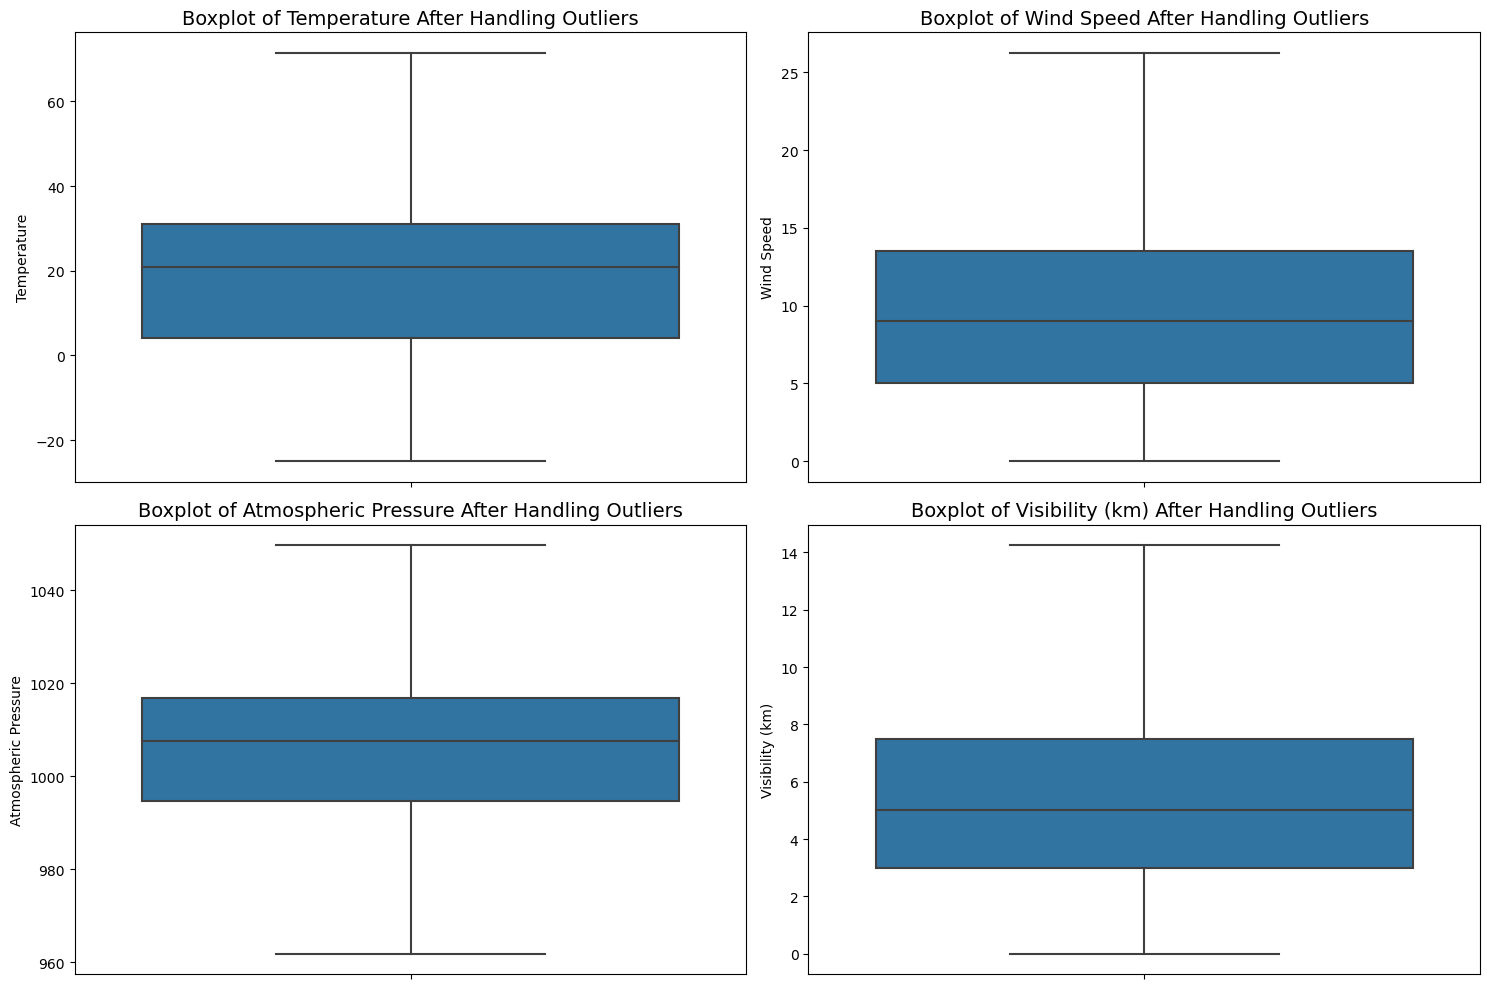

In [11]:
# Menampilkan boxplot untuk melihat hasil setelah penanganan outlier
plt.figure(figsize=(15, 10))
for i, column in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column} After Handling Outliers', fontsize=14)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi box plot diatas, dapat dibuktikan bahwa semua nilai outlier pada masing-masing variabel telah berhasil diatasi. Dengan begitu, data telah siap untuk diolah lebih lanjut.

## E. Transformasi Data

### 1. Normalisasi dan Standarisasi

Normalisasi merupakan proses mengubah skala data sehingga nilanya berada dalam rentang tertentu, biasanya antara 0 hingga 1. Normalisasi dilakukan apabila suatu variabel memiliki skala yang sangat berbeda dengan variabel lainnya. Perbedaan tersebut dapat menyebabkan adanya dominasi variabel dengan nilai besar terhadap variabel lain. Akibatnya, hasil pengolahan maupun visualisasi dari data menjadi tidak akurat. Sementara itu, Standarisasi adalah teknik yang mengubah skala data sehingga memiliki rata-rata 0 dan deviasi standar 1. Proses ini dilakukan dengan mengurangi rata-rata dari setiap nilai, lalu membaginya dengan deviasi standar. Dalam dataset ini, variabel Atmospheric Pressure memiliki skala yang sangat berbeda dengan variabel lain, yaitu 800 hingga 1200. Sedangkan variabel lain hanya berskala -25 hingga 109. Oleh karena itu, perlu dilakukan normalisasi dan standarisasi pada variabel tersebut.

In [13]:
# Kolom yang digunakan
column_to_scale = 'Atmospheric Pressure'

# Normalisasi
scaler_minmax = MinMaxScaler()
df['Atmospheric Pressure_normalisasi'] = scaler_minmax.fit_transform(df[[column_to_scale]])

# Standarisasi 
scaler_standard = StandardScaler()
df['Atmospheric Pressure_standarisasi'] = scaler_standard.fit_transform(df[[column_to_scale]])

print("Data Normalisasi :")
print(df['Atmospheric Pressure_normalisasi'])
print("\nData Standarisasi :")
print(df['Atmospheric Pressure_standarisasi'])

Data Normalisasi :
0        0.557273
1        0.564214
2        0.647158
3        0.732834
4        0.328009
           ...   
13195    0.470005
13196    1.000000
13197    0.578550
13198    0.255191
13199    0.609043
Name: Atmospheric Pressure_normalisasi, Length: 13200, dtype: float64

Data Standarisasi :
0        0.277477
1        0.313030
2        0.737919
3        1.176797
4       -0.896943
           ...   
13195   -0.169560
13196    2.545375
13197    0.386468
13198   -1.269960
13199    0.542669
Name: Atmospheric Pressure_standarisasi, Length: 13200, dtype: float64


Untuk memperjelas perbedaan sebelum dan sesudah dilakukannya normalisasi serta standarisasi, perlu ditampilkan histogram dari variabel yang terlibat. 

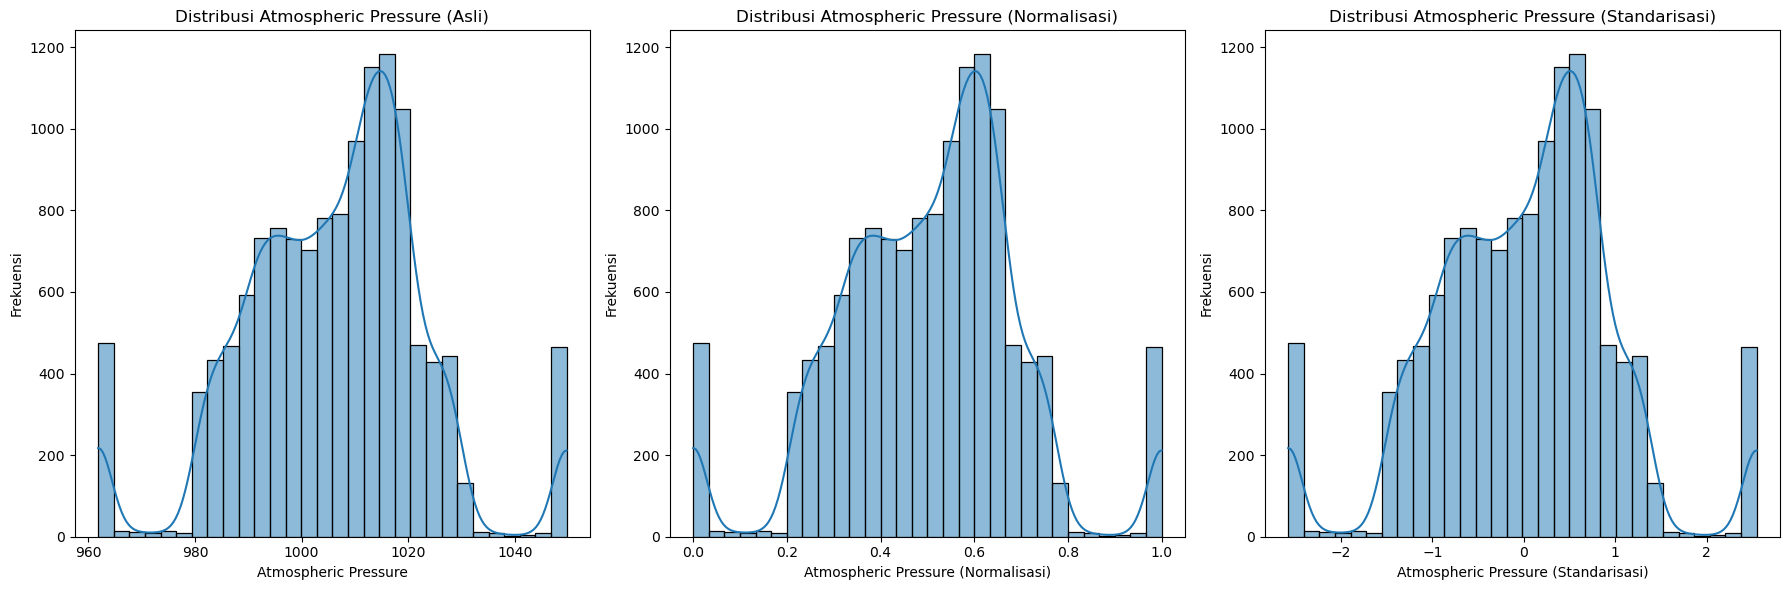

In [14]:
# Menampilkan data sebelum dan sesudah 
plt.figure(figsize=(18, 6))

# Histogram data asli
plt.subplot(1, 3, 1)
sns.histplot(df[column_to_scale], bins=30, kde=True)
plt.title('Distribusi Atmospheric Pressure (Asli)')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Frekuensi')

# Histogram data normalisasi
plt.subplot(1, 3, 2)
sns.histplot(df['Atmospheric Pressure_normalisasi'], bins=30, kde=True)
plt.title('Distribusi Atmospheric Pressure (Normalisasi)')
plt.xlabel('Atmospheric Pressure (Normalisasi)')
plt.ylabel('Frekuensi')

# Histogram data standarisasi
plt.subplot(1, 3, 3)
sns.histplot(df['Atmospheric Pressure_standarisasi'], bins=30, kde=True)
plt.title('Distribusi Atmospheric Pressure (Standarisasi)')
plt.xlabel('Atmospheric Pressure (Standarisasi)')
plt.ylabel('Frekuensi')

plt.tight_layout() 
plt.show()  

Dari histogram diatas, dapat dilihat bahwa skala dalam variabel Atmospheric Pressure yang semula berada di rentang 800 hingga 1200 diubah menjadi rentang 0 hingga 1. Namun, perubahan skala tersebut tidak diikuti oleh perubahan distribusi dari variabel Atmospheric Pressure. Dengan begitu, dapat disimpulkan bahwa normalisasi dan standarisasi hanya akan mengubah skala, mean, serta standar deviasi dari sebuah variabel tanpa mengubah distribusinya.

### 2. Log Transformasi

Data Wind Speed (Log Transformed):
0    2.351375
1    2.251292
2    2.079442
3    0.916291
4    2.890372
Name: Wind Speed_Log, dtype: float64


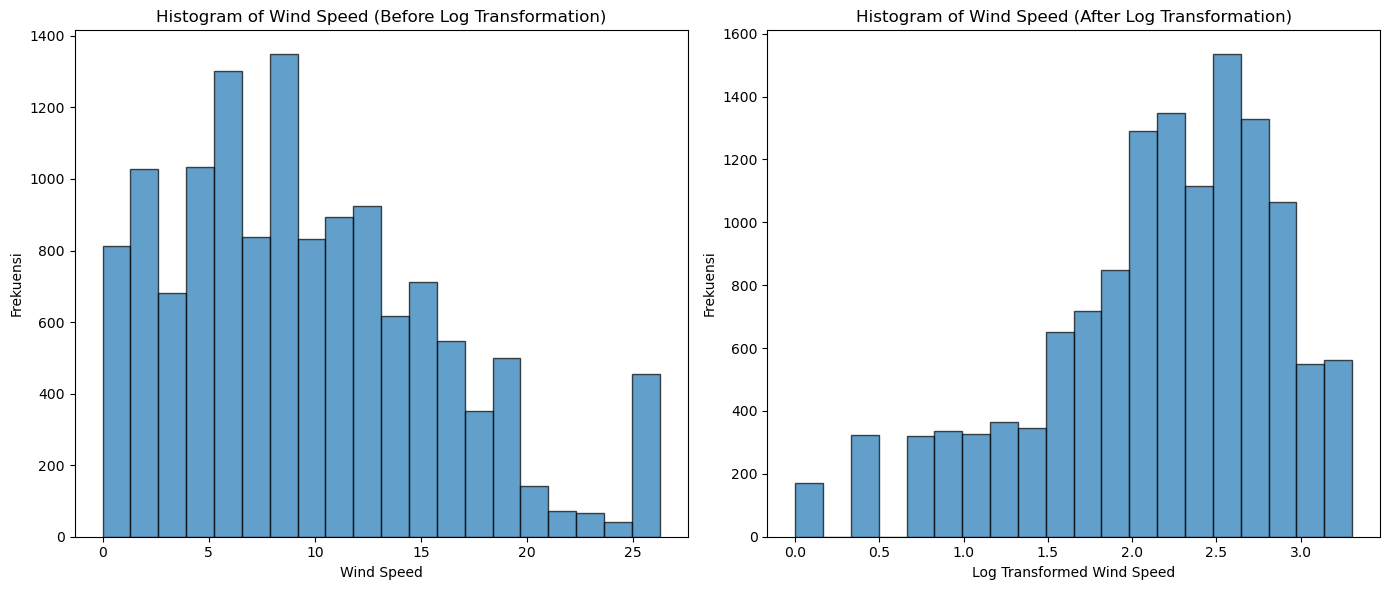

In [15]:
# Melakukan log transformasi pada variabel Wind Speed
df['Wind Speed_Log'] = np.log1p(df['Wind Speed']) 
print("Data Wind Speed (Log Transformed):")
print(df['Wind Speed_Log'].head())

# Menampilkan histogram sebelum dan sesudah log transformasi
plt.figure(figsize=(14, 6))

# Histogram sebelum transformasi
plt.subplot(1, 2, 1)
plt.hist(df['Wind Speed'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Histogram of Wind Speed (Before Log Transformation)')
plt.xlabel('Wind Speed')
plt.ylabel('Frekuensi')

# Histogram setelah transformasi
plt.subplot(1, 2, 2)
plt.hist(df['Wind Speed_Log'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Histogram of Wind Speed (After Log Transformation)')
plt.xlabel('Log Transformed Wind Speed')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Log transformasi digunakan untuk membantu memenuhi asumsi normal pada suatu data. Pada variabel Wind Speed, data awalnya tidak berdistribusi normal karena persebaran data tidak membentuk kurva lonceng. Setelah log transformasi diterapkan, distribusi data menunjukkan perubahan menuju distribusi normal, meskipun belum sepenuhnya sempurna.

### 3. Kategorisasi Variabel

In [16]:
def categorize_uv_index(uv_index):
    if uv_index >= 1 and uv_index <= 2:
        return 'Rendah'
    elif uv_index >= 3 and uv_index <= 5:
        return 'Sedang'
    elif uv_index >= 6 and uv_index <= 7:
        return 'Tinggi'
    elif uv_index >= 8 and uv_index <= 10:
        return 'Sangat Tinggi'
    elif uv_index > 10:
        return 'Ekstrim'
    else:
        return 'Tidak Terdefinisi'

df['UV Index'] = pd.to_numeric(df['UV Index'], errors='coerce') 
df['UV_Index_Category'] = df['UV Index'].apply(categorize_uv_index)
print(df[['UV Index', 'UV_Index_Category']].head()) 

   UV Index UV_Index_Category
0         2            Rendah
1         7            Tinggi
2         5            Sedang
3         7            Tinggi
4         1            Rendah


Dalam dataset ini, saya memilih variabel UV Index untuk dikategorikan berdasarkan tingkat paparan radiasi sinar UV terhadap kesehatan manusia. Pengkategorian ini bertujuan untuk memudahkan seseorang dalam mengidentifikasi apakah paparan sinar UV pada suatu waktu berpotensi berbahaya bagi kesehatan atau tidak.